In [ ]:
''' working on the visa data to know that the applied persons visa is certified or denied'''

# importing the required packages

In [1]:
import os
os.getcwd()

'C:\\Users\\DELL\\Documents\\EDA_Model_visadataset'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [3]:
df=pd.read_csv('Visadataset.csv')
df.head(4)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied


# data inspection

In [4]:
df.shape

(25480, 12)

In [5]:
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [6]:
#here--rows=25480,
#----columns=12 columns

In [7]:
#here case id has the unique values so drop the column

In [8]:
df['case_id'].nunique()

25480

In [9]:
df=df.drop('case_id',axis=1)
df.shape

(25480, 11)

# null values checking

In [10]:
#checking the nulll values
df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [11]:
# no null values we can work on the data

In [12]:
cat,num=[],[]
for keys,values in (df.dtypes).items():
    if values=='O':
        cat.append(keys)
    else:
        num.append(keys)

# categorical numerical columns separation

In [13]:
cat

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [14]:
len(cat)
#we have 8 categorical columns

8

In [15]:
num
#we have only the 3 columns of numerical data

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [16]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# correlation

In [17]:
cor=df.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5228\960497222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


# Heat map

<Axes: >

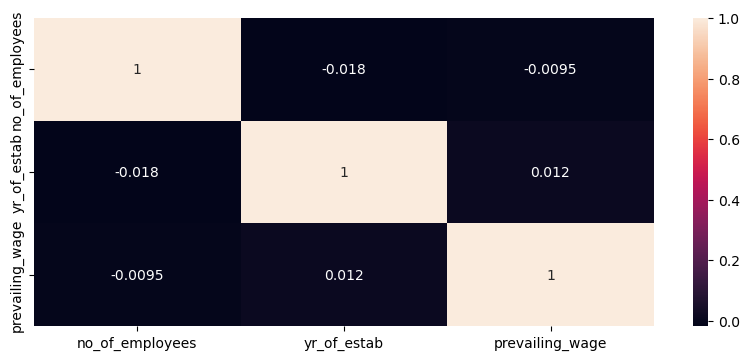

In [18]:
plt.figure(figsize=(10, 4))
sns.heatmap(cor, fmt='.2g', annot=True)

# Dealing with Outliers

In [19]:
# using the z-score method checking the outliers in the data

# box plot to visualize the outliers

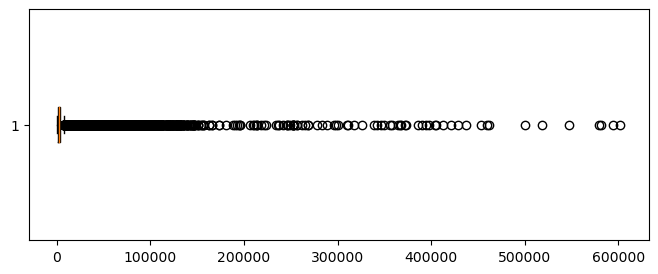

In [20]:
# box plots-for outliers-----run this code--pending....
plt.figure(figsize=(8,3))
plt.boxplot(df['no_of_employees'],vert=False)
plt.show()

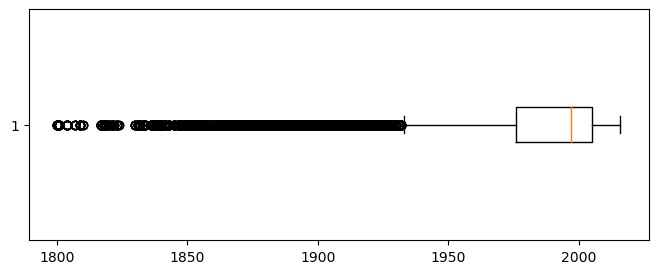

In [21]:
plt.figure(figsize=(8,3))
plt.boxplot(df['yr_of_estab'],vert=False)
plt.show()

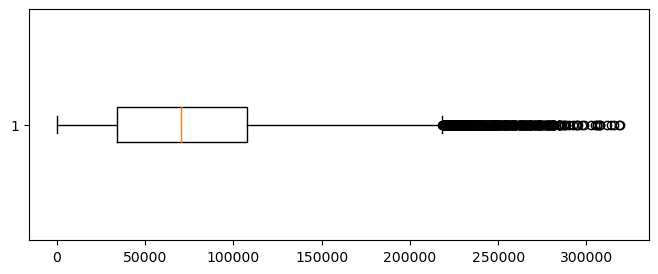

In [22]:
plt.figure(figsize=(8,3))
plt.boxplot(df['prevailing_wage'],vert=False)
plt.show()

# importing the package to find the outliers

In [23]:
from scipy import stats

columns=['no_of_employees', 'yr_of_estab', 'prevailing_wage']

z_scores = np.abs(stats.zscore(df[columns]))

z_score_threshold=3

outlier_indices = np.where(z_scores > z_score_threshold)[0]

df = df.drop(df.index[outlier_indices])


In [24]:
df.shape

(24097, 11)

In [25]:
#25480-original data set rows

#24097-after droping the outliers rows

In [26]:
25480-24097

1383

In [27]:
(1383/25480)*100
#5% of the rows was  droped

5.42778649921507

# heat map and corelation after clearing the outliers

In [28]:
cor1=df.corr()
cor1

C:\Users\DELL\AppData\Local\Temp\ipykernel_5228\3883913210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor1=df.corr()


,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,0.001187,-0.004514
yr_of_estab,0.001187,1.000000,0.019285
prevailing_wage,-0.004514,0.019285,1.000000


<Axes: >

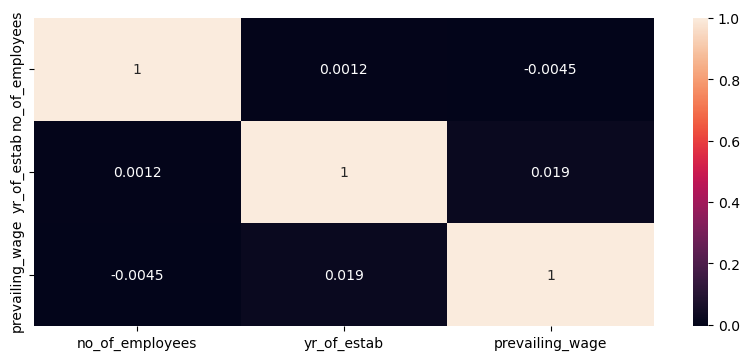

In [29]:
plt.figure(figsize=(10,4))
sns.heatmap(cor1, fmt='.2g', annot=True)

# categorical to numerical column

In [30]:
for categorical in cat:
    from sklearn.preprocessing import LabelEncoder  # Import the package
    le=LabelEncoder()  # save the package
    df[categorical]=le.fit_transform(df[categorical]) # Apply fit transform

In [31]:
df.head(4)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,1,0,0,0,98,1897,4,83434.0300,3,1,1


In [32]:
df1= pd.DataFrame(df)

df1.to_csv('Visadata_preprocessed.csv', index=False)

In [33]:
df1=pd.read_csv('Visadata_preprocessed.csv')
df1.head(4)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,1,0,0,0,98,1897,4,83434.0300,3,1,1


In [34]:
df1.shape

(24097, 11)

# seaparating the data into input-X and output-y

In [35]:
X=df.drop('case_status',axis=1)
y=df['case_status']

# feature selection using the -Mutual Info Clasifi method

In [36]:
from sklearn.feature_selection import mutual_info_classif
MI=mutual_info_classif(X,y)
MI

array([0.00662145, 0.05120086, 0.02033962, 0.00612655, 0.00235631,
       0.00388416, 0.01092362, 0.01409298, 0.02226787, 0.0043269 ])

In [37]:
value=pd.Series(MI)
value.index=X.columns

In [38]:
value.sort_values(ascending=True)

no_of_employees          0.002356
yr_of_estab              0.003884
full_time_position       0.004327
requires_job_training    0.006127
continent                0.006621
region_of_employment     0.010924
prevailing_wage          0.014093
has_job_experience       0.020340
unit_of_wage             0.022268
education_of_employee    0.051201
dtype: float64

<Axes: >

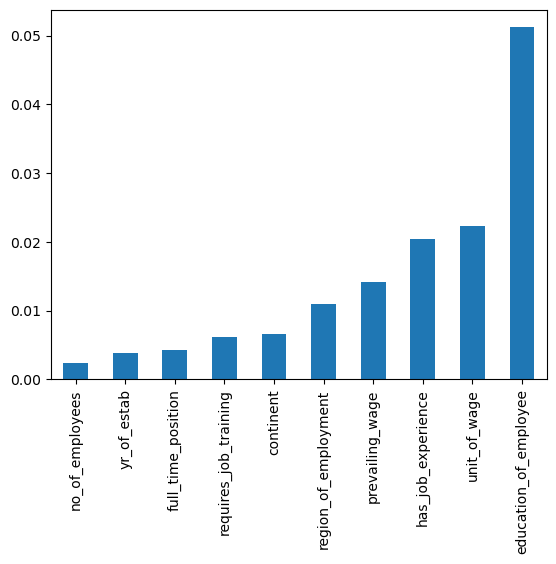

In [39]:
value.sort_values(ascending=True).plot(kind='bar')

In [40]:
# here droping the requires_job_training column which is very less relation

In [41]:
X.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position'],
      dtype='object')

In [42]:
X=df.drop(['requires_job_training','case_status'],axis=1)
y=df['case_status']

# training the model by  Machine leraning algorithms

# without Hyper parameter Tuning

# Decision Tree-Model-1

,accuracy,precision,recall,f1_score
Decision Tree,65.77,52.32,48.43,50.3


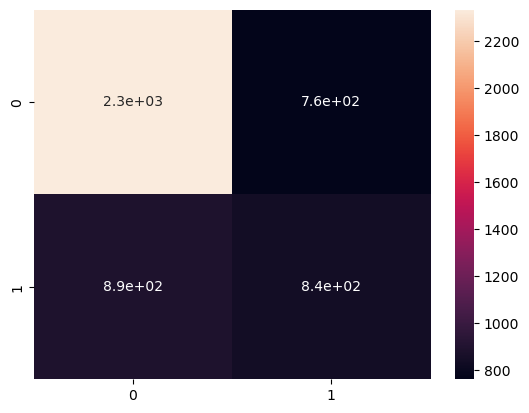

In [43]:
###############---spliting the data-----###############


X=df.drop('case_status',axis=1)
y=df['case_status']

################---segregating the data into Train data and the test data----###########################


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              random_state=0,
                                              test_size=0.2)

###################------------Fitting the model-----####################################

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

##################---calculating the model prediction value-------###############################

y_pred_dt=dt.predict(X_test)
y_pred_dt

##################-------importing the package and calculating the metrics------###############################


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

dtree_cmt=confusion_matrix(y_pred_dt,y_test)
dtree_cmt
sns.heatmap(dtree_cmt,annot=True)


###################----calculating  the metrics for clasification algorithn-----#############################

dt_metrics={}
dt_metrics['accuracy']=round(accuracy_score(y_pred_dt,y_test)*100,2)
dt_metrics['precision']=round(precision_score(y_pred_dt,y_test)*100,2)
dt_metrics['recall']=round(recall_score(y_pred_dt,y_test)*100,2)
dt_metrics['f1_score']=round(f1_score(y_pred_dt,y_test)*100,2)
dt_metrics

dt_metrics_df=pd.DataFrame(dt_metrics,index=['Decision Tree'])
dt_metrics_df

# K-nearest Neighbours-Model-2

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,accuracy,precision,recall,f1_score
KNN,63.36,27.69,41.94,33.36


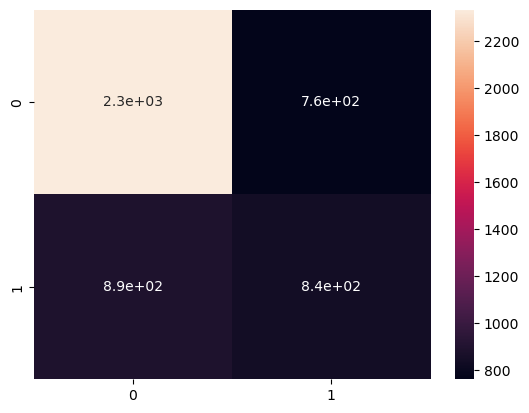

In [44]:
###############---spliting the data-----###############

X=df.drop('case_status',axis=1)
y=df['case_status']

################---segregating the data into Train data and the test data----###########################

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              random_state=0,
                                              test_size=0.2)
##################--fitting the model-------#####################################
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train, y_train)

##################--calculating the model predicted value----###############################

y_pred_KNN=KNN.predict(X_test.values)
y_pred_KNN

#####################----calculating the metrics---===############################
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

KNN_cmt=confusion_matrix(y_pred_dt,y_test)
KNN_cmt

sns.heatmap(KNN_cmt,annot=True)
#####################-----creating the data frame for the metrics value-----###########################

KNN_metrics={}
KNN_metrics['accuracy']=round(accuracy_score(y_pred_KNN,y_test)*100,2)
KNN_metrics['precision']=round(precision_score(y_pred_KNN,y_test)*100,2)
KNN_metrics['recall']=round(recall_score(y_pred_KNN,y_test)*100,2)
KNN_metrics['f1_score']=round(f1_score(y_pred_KNN,y_test)*100,2)
KNN_metrics

KNN_metrics_df=pd.DataFrame(KNN_metrics,index=['KNN'])
KNN_metrics_df

# Navie bayes-Model-3

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


,accuracy,precision,recall,f1_score
Navie Bayes,69.05,15.48,63.33,24.87


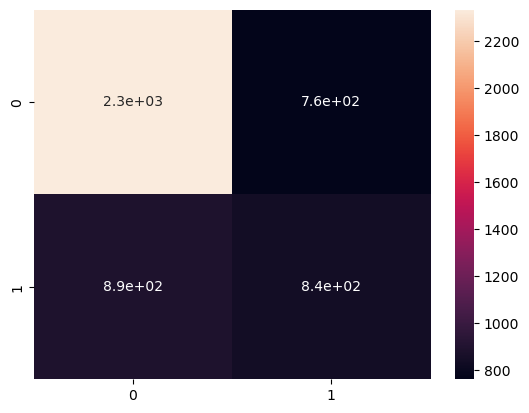

In [45]:
##############------splitting the data-----######################

X=df.drop('case_status',axis=1)
y=df['case_status']

####################---segregating the data into Train data and the test data----##########

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              random_state=0,
                                              test_size=0.2)
#####################----Fitting the model---------##############################
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train, y_train)

######################-----calculating the model predicted value-----------------###########################

y_pred_NB=NB.predict(X_test.values)
y_pred_NB

#######################--------calculating the metrics--------------##########################
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

NB_cmt=confusion_matrix(y_pred_dt,y_test)
NB_cmt

sns.heatmap(NB_cmt,annot=True)

###################-----creating the data frame for the calculated metrics--------#############################

NB_metrics={}
NB_metrics['accuracy']=round(accuracy_score(y_pred_NB,y_test)*100,2)
NB_metrics['precision']=round(precision_score(y_pred_NB,y_test)*100,2)
NB_metrics['recall']=round(recall_score(y_pred_NB,y_test)*100,2)
NB_metrics['f1_score']=round(f1_score(y_pred_NB,y_test)*100,2)
NB_metrics

NB_metrics_df=pd.DataFrame(NB_metrics,index=['Navie Bayes'])
NB_metrics_df

# Logistic Regressio-Model-4

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,f1_score
Logistic Regression,66.89,0.0,0.0,0.0


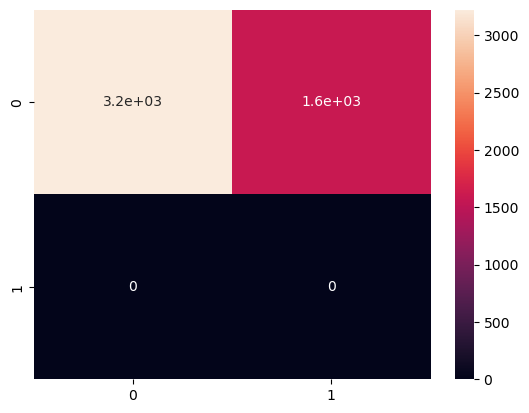

In [46]:
################-----splitting the data-----######################

X=df.drop('case_status',axis=1)
y=df['case_status']

#################-----model selection---------#########################

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              random_state=0,
                                              test_size=0.2)
##################--------------fitting the model--------#################################
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression()
LG.fit(X_train, y_train)

#################---calculating the model predicted value---------------##############################

y_pred_LG=LG.predict(X_test.values)
y_pred_LG

##################----calculating the metrics-----------###############################
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

LG_cmt=confusion_matrix(y_pred_LG,y_test)
LG_cmt

sns.heatmap(LG_cmt,annot=True)
####################--------------creating the data frame for the calculated metrics------------##########################

LG_metrics={}
LG_metrics['accuracy']=round(accuracy_score(y_pred_LG,y_test)*100,2)
LG_metrics['precision']=round(precision_score(y_pred_LG,y_test)*100,2)
LG_metrics['recall']=round(recall_score(y_pred_LG,y_test)*100,2)
LG_metrics['f1_score']=round(f1_score(y_pred_LG,y_test)*100,2)
LG_metrics

LG_metrics_df=pd.DataFrame(LG_metrics,index=['Logistic Regression'])
LG_metrics_df

# Random Forest-Model-5

,accuracy,precision,recall,f1_score
Random Forest,72.66,49.12,60.78,54.33


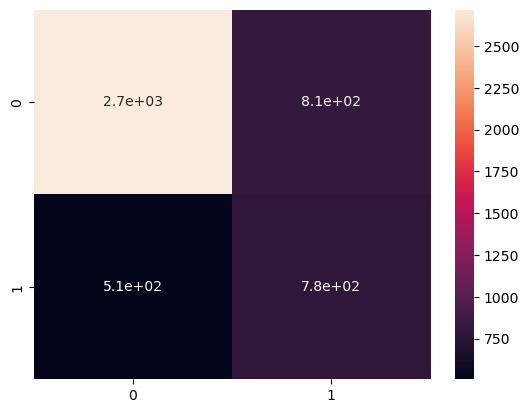

In [47]:
################-----------splitting the data into input-X and the ouput-y--------############333

X=df.drop('case_status',axis=1)
y=df['case_status']


################-----------model selction-----------##############################
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              random_state=0,
                                              test_size=0.2)
########################--------model training------------######################################
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

################---------calculating the model predicted value---------################


y_pred_RF=RF.predict(X_test)
y_pred_RF

#################-------calculating the metrics in classification-------##############################
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

RF_cmt=confusion_matrix(y_pred_RF,y_test)
RF_cmt
sns.heatmap(RF_cmt,annot=True)

#################-------------creating the data frame for the calculated accuracy-------#############################

RF_metrics={}
RF_metrics['accuracy']=round(accuracy_score(y_pred_RF,y_test)*100,2)
RF_metrics['precision']=round(precision_score(y_pred_RF,y_test)*100,2)
RF_metrics['recall']=round(recall_score(y_pred_RF,y_test)*100,2)
RF_metrics['f1_score']=round(f1_score(y_pred_RF,y_test)*100,2)
RF_metrics

RF_metrics_df=pd.DataFrame(RF_metrics,index=['Random Forest'])
RF_metrics_df

# creating the data frame for the metrics calculated in the clasification models

In [48]:
Metrics_df = pd.concat([RF_metrics_df,NB_metrics_df,LG_metrics_df,NB_metrics_df,dt_metrics_df], axis=0)


In [49]:
Metrics_df

,accuracy,precision,recall,f1_score
Random Forest,72.66,49.12,60.78,54.33
Navie Bayes,69.05,15.48,63.33,24.87
Logistic Regression,66.89,0.00,0.00,0.00
Navie Bayes,69.05,15.48,63.33,24.87
Decision Tree,65.77,52.32,48.43,50.30
